<a href="https://colab.research.google.com/github/irshandyaditya/machine_learning/blob/Week-8/P8/UTS_ML_Kelompok2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJIAN TENGAH SEMESTER 2024-2025
# Pembelajaran Mesin
Klasifikasi Neural Network (NN) Pada Data Citra

## Kelompok 2
### Nama Anggota :
- Amanda Fadilla Erros / 2241720177
- Irshandy Aditya Wicaksana / 2241720148
- Muhammad Bagus Indrawan / 2241720217
- Riska Kurnia Triwulandari / 2241720039

# Intro

Pada UTS ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Casia-Webface (Data dapat diunduh pada Kaggle).
Anda diperbolehkan melakukan eksplorasi terhadap:
1. Metode pra pengolahan
2. Pemilihan fitur
3. Arsitektur ANN
4. Fungsi Aktiviasi
5. Metric Evaluasi

# Preparation

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from collections import Counter
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from random import sample
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color

# Load Data

In [ ]:
def load_data(data_dir, target_size=(128, 128), min_images_per_person=30, max_images_per_person=50, max_persons=2000):
    data = []  # List untuk menyimpan gambar dan label
    label_map = {}  # Mapping nama folder ke label numerik
    images_per_label = Counter()  # Counter untuk menghitung jumlah gambar per label

    # Mendapatkan daftar folder yang berisi gambar
    person_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

    # Memproses maksimal sejumlah 'max_persons' folder untuk menjaga batas jumlah orang
    person_folders = person_folders[:max_persons]

    # Memproses setiap folder orang
    for idx, person in enumerate(person_folders):
        person_path = os.path.join(data_dir, person)
        img_files = [f for f in os.listdir(person_path) if f.endswith('.jpg')]  # Memilih file dengan ekstensi .jpg

        # Lewati folder jika jumlah gambar kurang dari batas minimum yang ditentukan
        if len(img_files) < min_images_per_person:
            continue

        img_count = 0  # Inisialisasi penghitung gambar per orang

        # Memetakan folder (orang) ke label numerik berdasarkan urutan folder
        label_map[person] = idx

        # Memuat gambar-gambar dalam folder, hingga mencapai batas maksimal per orang
        for img_file in img_files[:max_images_per_person]:
            img_path = os.path.join(person_path, img_file)

            # Memuat dan mengubah ukuran gambar sesuai target_size
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array = img_array / 255.0  # Normalisasi nilai piksel antara 0 dan 1

            # Menyimpan gambar dan label dalam format (image_array, label)
            data.append((img_array, idx))  # idx adalah label numerik yang sesuai

            img_count += 1  # Menambah penghitung gambar per orang
            images_per_label[idx] += 1  # Menambah jumlah gambar untuk label tersebut

            # Hentikan jika mencapai batas max_images_per_person
            if img_count >= max_images_per_person:
                break

    # Konversi list gambar dan label ke array NumPy
    images_array = np.array([img for img, _ in data])  # Array untuk menyimpan gambar
    labels_array = np.array([label for _, label in data])  # Array untuk menyimpan label

    return images_array, labels_array, images_per_label

# Path ke dataset
data_directory = 'casia-webface'

# Memuat data gambar dan label
images, labels, images_per_label = load_data(data_directory)

# Tampilkan ukuran array gambar dan label
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)

# Menampilkan jumlah gambar per label
for label, count in images_per_label.items():
    print(f"Label {label}: {count} images")


Shape of images array: (57069, 128, 128, 3)
Shape of labels array: (57069,)
Label 1: 50 images
Label 2: 50 images
Label 3: 50 images
Label 4: 50 images
Label 6: 50 images
Label 8: 50 images
Label 9: 50 images
Label 10: 50 images
Label 12: 50 images
Label 13: 50 images
Label 14: 50 images
Label 16: 50 images
Label 17: 37 images
Label 18: 50 images
Label 19: 50 images
Label 20: 50 images
Label 21: 50 images
Label 22: 50 images
Label 23: 50 images
Label 24: 50 images
Label 25: 50 images
Label 26: 50 images
Label 27: 50 images
Label 29: 50 images
Label 30: 50 images
Label 31: 50 images
Label 32: 50 images
Label 33: 50 images
Label 34: 50 images
Label 35: 50 images
Label 36: 50 images
Label 37: 50 images
Label 38: 50 images
Label 39: 50 images
Label 40: 50 images
Label 41: 50 images
Label 42: 50 images
Label 43: 50 images
Label 44: 34 images
Label 46: 50 images
Label 47: 50 images
Label 48: 38 images
Label 49: 50 images
Label 51: 50 images
Label 54: 50 images
Label 56: 50 images
Label 57: 5

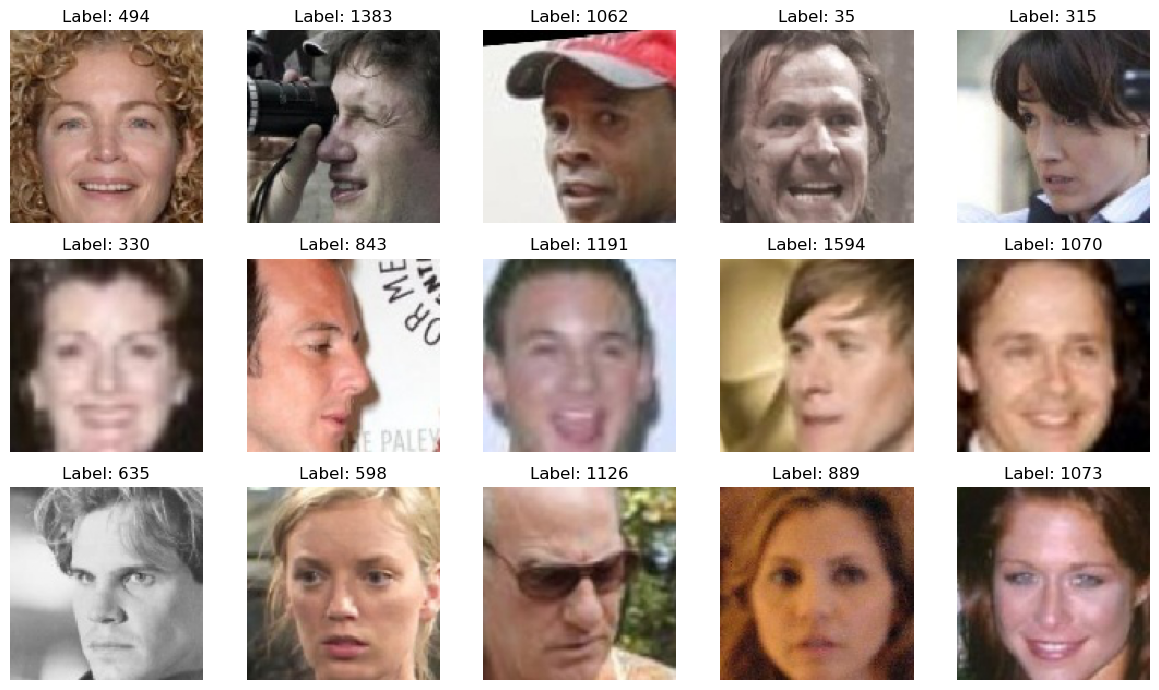

Jumlah Orang:  1245


In [ ]:
# Memilih 15 indeks acak dari array gambar untuk ditampilkan
random_indices = sample(range(images.shape[0]), 15)

# Membuat figur dengan ukuran 12x7 untuk plot gambar
plt.figure(figsize=(12, 7))

# Loop untuk menampilkan 15 gambar acak
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i + 1)  # Membuat subplot 3x5 untuk 15 gambar
    plt.imshow(images[idx], cmap='bone')  # Menampilkan gambar dalam skala warna 'bone'
    plt.title(f'Label: {labels[idx]}')  # Menampilkan label sebagai judul
    plt.axis('off')  # Menyembunyikan axis untuk tampilan lebih bersih

# Mengatur layout agar tidak ada tumpang tindih antar subplot
plt.tight_layout()
plt.show()

# Menampilkan jumlah unik orang berdasarkan label yang ada
print("Jumlah Orang: ", len(np.unique(labels)))


# Preprocessing

In [ ]:
def extract_features_hog(image_array, labels, batch_size, target_size):
    all_features = []  # List untuk menyimpan semua fitur HOG dari gambar
    all_labels = []    # List untuk menyimpan semua label
    total_images = len(image_array)

    print("Memulai ekstraksi fitur HOG...")

    # Proses setiap batch dari gambar untuk menghemat memori
    for i in range(0, total_images, batch_size):
        # Ambil batch dari array gambar dan label
        batch_images = image_array[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]

        batch_features = []  # Menyimpan fitur HOG dari batch saat ini
        valid_labels = []    # Menyimpan label yang sesuai

        # Memproses setiap gambar dalam batch
        for img, label in zip(batch_images, batch_labels):
            # Periksa apakah ukuran gambar sesuai dengan target_size, resize jika perlu
            if img.shape[:2] != target_size:
                img = np.resize(img, target_size)

            # Konversi gambar ke grayscale karena HOG bekerja pada citra grayscale
            gray_img = color.rgb2gray(img)

            # Ekstraksi fitur HOG tanpa visualisasi untuk mempercepat proses
            features = hog(
                gray_img,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                feature_vector=True  # Setel visualize=False agar menghasilkan vektor fitur saja
            )

            # Tambahkan fitur dan label ke batch saat ini
            batch_features.append(features)
            valid_labels.append(label)

        # Tambahkan batch fitur dan label yang sudah diproses ke list utama
        if batch_features:
            all_features.extend(batch_features)
            all_labels.extend(valid_labels)

        # Cetak kemajuan pemrosesan
        print(f"Processed {min(i + batch_size, total_images)}/{total_images} images")

    # Konversi list hasil fitur dan label ke array NumPy
    return np.array(all_features), np.array(all_labels)

# Contoh pemanggilan fungsi
# Asumsikan `images` adalah array berisi gambar dan `labels` adalah array berisi label
features, label_hog = extract_features_hog(images, labels, batch_size=32, target_size=(128, 128))

# Menampilkan bentuk array fitur HOG dan label
print("Bentuk fitur HOG:", features.shape)
print("Bentuk label:", label_hog.shape)


Memulai ekstraksi fitur HOG...
Processed 32/57069 images
Processed 64/57069 images
Processed 96/57069 images
Processed 128/57069 images
Processed 160/57069 images
Processed 192/57069 images
Processed 224/57069 images
Processed 256/57069 images
Processed 288/57069 images
Processed 320/57069 images
Processed 352/57069 images
Processed 384/57069 images
Processed 416/57069 images
Processed 448/57069 images
Processed 480/57069 images
Processed 512/57069 images
Processed 544/57069 images
Processed 576/57069 images
Processed 608/57069 images
Processed 640/57069 images
Processed 672/57069 images
Processed 704/57069 images
Processed 736/57069 images
Processed 768/57069 images
Processed 800/57069 images
Processed 832/57069 images
Processed 864/57069 images
Processed 896/57069 images
Processed 928/57069 images
Processed 960/57069 images
Processed 992/57069 images
Processed 1024/57069 images
Processed 1056/57069 images
Processed 1088/57069 images
Processed 1120/57069 images
Processed 1152/57069 im

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Transformasi label menjadi format numerik menggunakan LabelEncoder
labels_encoded = le.fit_transform(label_hog)

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training (80%) dan sisanya (20%) sebagai data sementara (X_temp, y_temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# Membagi data sementara (X_temp, y_temp) menjadi validation (10%) dan test set (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Build Model

In [ ]:
# Inisialisasi PCA dengan 600 komponen utama
pca = PCA(n_components=600, random_state=42)

# Melakukan fit dan transformasi pada training set untuk mendapatkan komponen utama
X_train_pca = pca.fit_transform(X_train)

# Transformasi validation dan test set menggunakan model PCA yang sudah di-fit pada training set
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)


In [ ]:
# Hitung jumlah kelas berdasarkan label yang ada
num_classes = len(np.unique(labels_encoded))

# Fungsi untuk membangun model ANN
def build_ann_model(input_shape):
    model = Sequential()
    # Lapisan pertama dengan 512 neuron dan ReLU activation
    model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
    model.add(BatchNormalization())  # Normalisasi batch untuk stabilitas
    model.add(Dropout(0.4))          # Dropout untuk mencegah overfitting

    # Lapisan kedua dengan 128 neuron dan ReLU activation
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Lapisan output dengan jumlah neuron = jumlah kelas, dan aktivasi softmax untuk klasifikasi multi-kelas
    model.add(Dense(num_classes, activation='softmax'))

    # Kompilasi model dengan Adam optimizer dan sparse_categorical_crossentropy loss
    model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Inisialisasi model dengan bentuk input sesuai fitur hasil PCA
model = build_ann_model(X_train_pca.shape[1])

# Menyiapkan callback untuk menyesuaikan learning rate jika model stagnan pada val_loss
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss untuk penurunan learning rate
        factor=0.5,          # Kurangi learning rate sebesar 50% jika tidak ada peningkatan
        patience=3,          # Jumlah epoch tanpa peningkatan sebelum menurunkan learning rate
        min_lr=1e-6          # Learning rate minimum untuk menghindari terlalu kecil
    )
]

# Melatih model pada data training dan validasi
history = model.fit(
    X_train_pca, y_train,
    epochs=50,                     # Jumlah epoch
    validation_data=(X_val_pca, y_val),  # Gunakan validation_data secara eksplisit
    callbacks=callbacks            # Gunakan callback untuk penyesuaian learning rate
)

# Evaluasi model ANN pada data validasi
val_loss, val_accuracy = history.model.evaluate(X_val_pca, y_val)
print(f"Accuracy on validation set (ANN only): {val_accuracy * 100:.2f}%")


c:\Users\INDRA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0098 - loss: 6.8988 - val_accuracy: 0.1281 - val_loss: 5.3447 - learning_rate: 0.0010
Epoch 2/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1144 - loss: 5.2069 - val_accuracy: 0.2753 - val_loss: 4.2120 - learning_rate: 0.0010
Epoch 3/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2311 - loss: 4.2612 - val_accuracy: 0.3641 - val_loss: 3.7164 - learning_rate: 0.0010
Epoch 4/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3013 - loss: 3.7560 - val_accuracy: 0.3944 - val_loss: 3.4942 - learning_rate: 0.0010
Epoch 5/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3401 - loss: 3.4859 - val_accuracy: 0.4169 - val_loss: 3.3552 - learning_rate: 0.0010
Epoch 6/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3671 - loss: 3.2981 - val_accuracy: 0.4281 - val_loss: 3.2872 - learning_rate: 0.0010
Epoch 7/50
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3938 - l

# Evaluation

In [ ]:
# Evaluasi model ANN pada data training
train_loss, train_accuracy = history.model.evaluate(X_train_pca, y_train)
print(f"Accuracy on train set (ANN only): {train_accuracy * 100:.2f}%")

# Evaluasi model ANN pada data test untuk mengukur generalisasi model
test_loss, test_accuracy = history.model.evaluate(X_test_pca, y_test)
print(f"Accuracy on test set (ANN only): {test_accuracy * 100:.2f}%")

1427/1427 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9530 - loss: 0.3568
Accuracy on train set (ANN only): 95.48%
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4903 - loss: 2.9850
Accuracy on test set (ANN only): 49.75%
